<a href="https://colab.research.google.com/github/vijayakrishna12345/Data-Analytics-Lab/blob/master/16z260_Final_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mounted the google drive to access data from gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#uploaded the csv file in the gdrive
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [0]:
#importing the neccessary libraries
import csv
import pandas as pd

In [0]:
#reading the book.csv file
path = "/content/book.csv"
df = pd.read_csv(path,encoding="ISO-8859-1")
#print(df.head(10))
df


,Cust_id,Age,Gender,Marital_Status,Car_Type,Income,Own_House
0,1.,22,Female,Single,Sedan,200000,No
1,2.,41,Female,Married,SUV,90000,Yes
2,3.,54,Male,Married,SUV,65000,Yes
3,4.,29,Male,Single,SUV,120000,No
4,5.,33,Male,Married,Sedan,66000,No
5,6.,42,Female,Married,SUV,250000,Yes
6,7.,25,Female,Single,Sedan,75000,No
7,8.,57,Female,Married,Sedan,140000,Yes
8,9.,44,Male,Married,Sedan,65000,Yes
9,10.,46,Male,Married,Sedan,80000,Yes


In [0]:
df.describe()

,Age,Income
count,15.000000,15.000000
mean,41.866667,94400.000000
std,13.141356,61141.288364
min,22.000000,30000.000000
25%,30.500000,65000.000000
50%,42.000000,75000.000000
75%,54.000000,105000.000000
max,64.000000,250000.000000


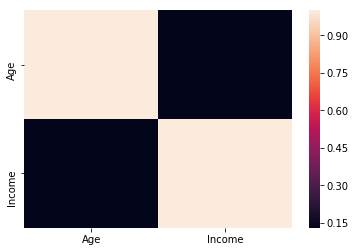

In [78]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95 and drop others
to_drop = [column for column in upper.columns if any(upper[column] < 0.1)]
df.drop(df.columns[to_drop], axis=1)
sns.heatmap(corr_matrix)

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=0)
y = df.Own_House
y
x = df.drop("Own_House", axis=1)
x

,Cust_id,Age,Gender,Marital_Status,Car_Type,Income
0,1.,22,Female,Single,Sedan,200000
1,2.,41,Female,Married,SUV,90000
2,3.,54,Male,Married,SUV,65000
3,4.,29,Male,Single,SUV,120000
4,5.,33,Male,Married,Sedan,66000
5,6.,42,Female,Married,SUV,250000
6,7.,25,Female,Single,Sedan,75000
7,8.,57,Female,Married,Sedan,140000
8,9.,44,Male,Married,Sedan,65000
9,10.,46,Male,Married,Sedan,80000


In [0]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)
print("X_train",X_train)

X_train        Cust_id  Age  Gender Marital_Status Car_Type  Income Own_House
9      10.       46    Male        Married    Sedan   80000       Yes
14     15.       54    Male        Married    Micro   35000        No
4   5.           33    Male        Married    Sedan   66000        No
2   3.           54    Male        Married      SUV   65000       Yes
13     14.       30    Male         Single    Micro   30000        No
10     11.       64    Male        Married      SUV   85000       Yes
7   8.           57  Female        Married    Sedan  140000       Yes
11     12.       31    Male         Single    Micro   40000        No
3   4.           29    Male         Single      SUV  120000        No
0   1.           22  Female         Single    Sedan  200000        No
5   6.           42  Female        Married      SUV  250000       Yes
12     13.       56  Female        Married      SUV   75000       Yes


In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#here the features used are age and income as the other ones that cannot be converted to float
used_features =["Age","Income"]
gnb.fit(
    X_train[used_features].values,
    X_train["Own_House"]
)
y_pred = gnb.predict(X_test[used_features])
print("Predictions:\n",y_pred)

Predictions:
 ['No' 'No' 'No']


In [0]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[2, 0],
       [1, 0]])

So here **Naive Bayes** has an accuracy of 2/3

In [75]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear') 
used_features =["Age","Income"]
clf.fit(
    X_train[used_features].values,
    X_train["Own_House"]
)
y_pred = clf.predict(X_test[used_features])
print("Predictions:\n",y_pred)

Predictions:
 ['No' 'No' 'No']


In [0]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[2, 0],
       [1, 0]])

So by analyzing these two classifiers we can come to a conclusion such that both of these gives same results for this dataset

In [0]:
data = df.iloc[:,1:-1]

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

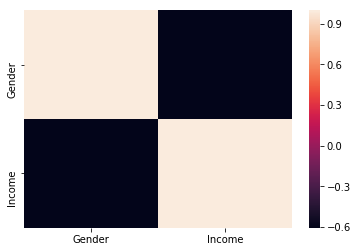

In [73]:
corr = data.corr()
sns.heatmap(corr)

In [76]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

IndexError: ignored